In [41]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(xx):
    return(1/(1+np.exp(-xx)))

def safe_log(xx):
    yy=np.zeros(shape=(len(xx),1))
    for ii in range(len(xx)):
        if xx[ii] < 1e-10 :
            yy[ii]=np.log(1e-10)
        else:
            yy[ii]=np.log(xx[ii])
    return(yy)

def safe_inv(xx):
    yy=np.zeros(shape=(len(xx),1))
    for ii in range(len(xx)):
        if np.abs(xx[ii]) < 1e-10 :
            yy[ii]=1e+10
        else:
            yy[ii]=1.0/xx[ii]
    return(yy)

def forward(xx,ww1,ww2,ww3):
    # Forward pass: compute predicted y
    zz1 = xx.dot(ww1)
    aa1 = np.maximum(zz1,0)       # ReLU
    zz2 = aa1.dot(ww2)
    aa2 = np.maximum(zz2,0)       # ReLU
    zz3 = aa2.dot(ww3)
    yy_pred = sigmoid(zz3)        # sigmoid
    return(yy_pred)



In [3]:
def module(xx):
    return(np.sqrt(xx.dot(xx)))

def plot_grid(ww1,ww2,ww3, xtest, ytest):
    
    plt.figure(figsize=(10,10))
    plt.xlim(-2,2) 
    plt.ylim(-2,2) 

    plt.title("Classification areas, orange: class 0, green: class 1. Also shows testing set")
    plt.xlabel("x0")
    plt.ylabel("x1")

    GRID=100
    grid=np.zeros(shape=(2*GRID,3))
    for height in range(-GRID,GRID):  
        for i in range(0,2*GRID):
            grid[i,0]= 2*(i-GRID)/GRID
            grid[i,1]= 2*height/GRID
            grid[i,2]=1

        pred_grid=forward(grid,ww1,ww2,ww3)
        idgrid_1 = np.where(pred_grid > 0.5)[0]
        idgrid_0 = np.where(pred_grid <= 0.5)[0]
    
        if len(idgrid_0)>0:
            plt.plot(grid[idgrid_0,0],grid[idgrid_0,1],"+",c="orange")
        if len(idgrid_1)>0:
            plt.plot(grid[idgrid_1,0],grid[idgrid_1,1],"+",c="green")

    idtest_1 = np.where(ytest > 0.5)[0]
    idtest_0 = np.where(ytest <= 0.5)[0]

    plt.plot(xtest[idtest_0,0],xtest[idtest_0,1],"d",c="red")
    plt.plot(xtest[idtest_1,0],xtest[idtest_1,1],"d",c="blue")
    plt.show()
    return()



# Underfitting

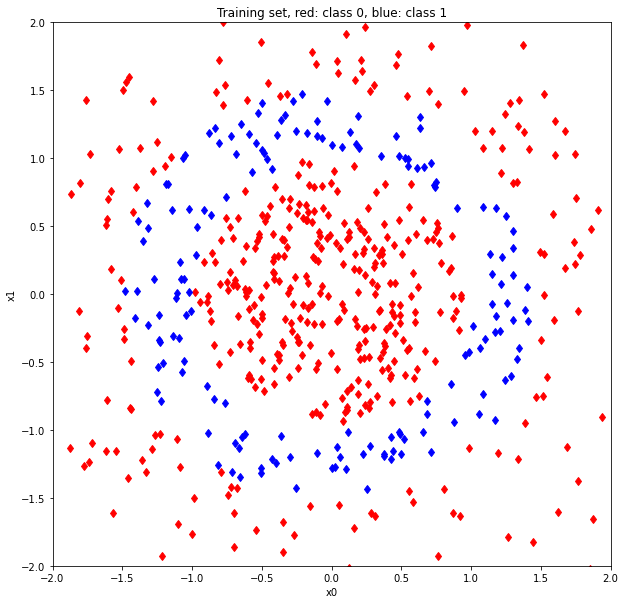

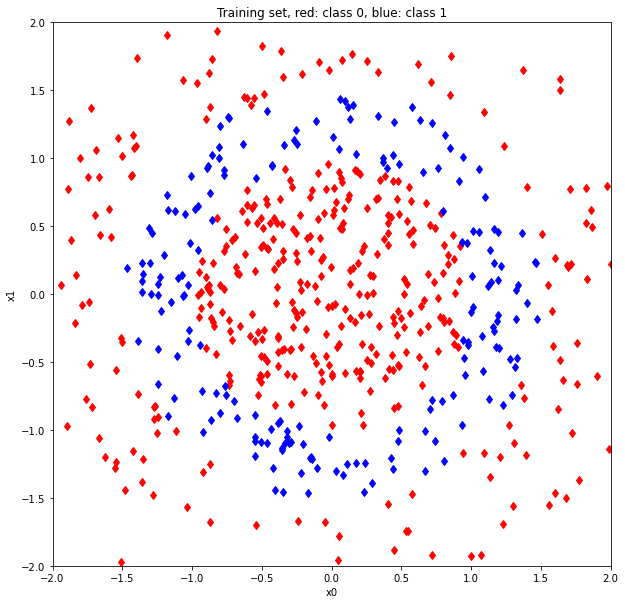

In [30]:
#####################################################
# T is batch size;
# H is hidden dimension
T=640
for H in np.linspace(1,5,2):
    D_in=3  # Input dimension (includes BIAS!)
    D_out=1 #output dimension, class (1,0) or (0,1)


    # create Training Set, classified according with radius to origin.
    # you may include some noise in the classification

    radius1=1
    radius2=1.5
    class_noise=0.0 #to modify later


    # Create random input data
    x=np.zeros(shape=(T,D_in))
    y = np.zeros(shape=(T,1))

    x[:,0] = np.random.randn(T)
    x[:,1] = np.random.randn(T)
    x[:,2] = 1              # For adding a bias in the first stage

    for i in range(T):
        mod=module(x[i,0:2])
        if( mod  + class_noise*np.random.randn()< radius1) or (mod  + class_noise*np.random.randn() > radius2):
            y[i]=0
        else:
            y[i]=1

    #create now a testing_set...same size

    # Create random input data
    xtest=np.ones(shape=(T,D_in))
    ytest = np.zeros(shape=(T,1))

    xtest[:,0] = np.random.randn(T)
    xtest[:,1] = np.random.randn(T)
    xtest[:,2] = 1  # For adding a bias in the first stage

    for i in range(T):
        mod=module(xtest[i,0:2])
        if( mod  + class_noise*np.random.randn()< radius1) or (mod  + class_noise*np.random.randn() > radius2):
            ytest[i]=0
        else:
            ytest[i]=1

    id_1 = np.where(y == 1)[0] #indexes of the elements in the set
    id_0 = np.where(y == 0)[0] #indexes of the elements not in the set



    plt.figure(figsize=(10,10))
    plt.xlim(-2,2) 
    plt.ylim(-2,2) 

    plt.title("Training set, red: class 0, blue: class 1")
    plt.xlabel("x0")
    plt.ylabel("x1")

    plt.plot(x[id_0,0],x[id_0,1],"d",c="red")
    plt.plot(x[id_1,0],x[id_1,1],"d",c="blue")

    plt.show()



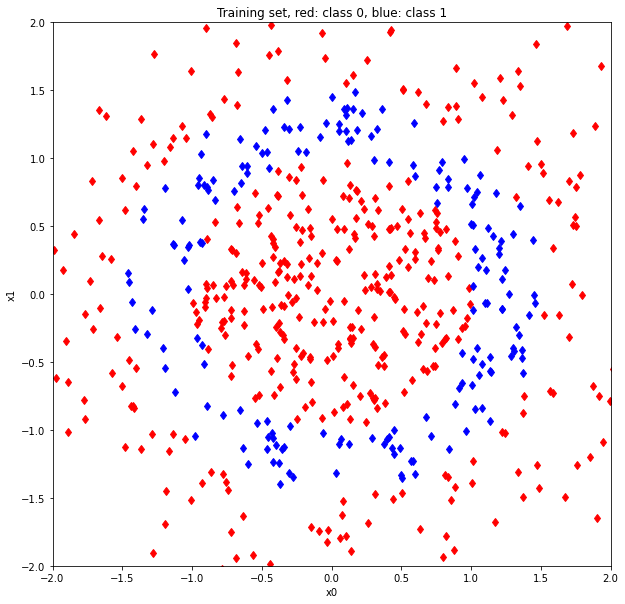

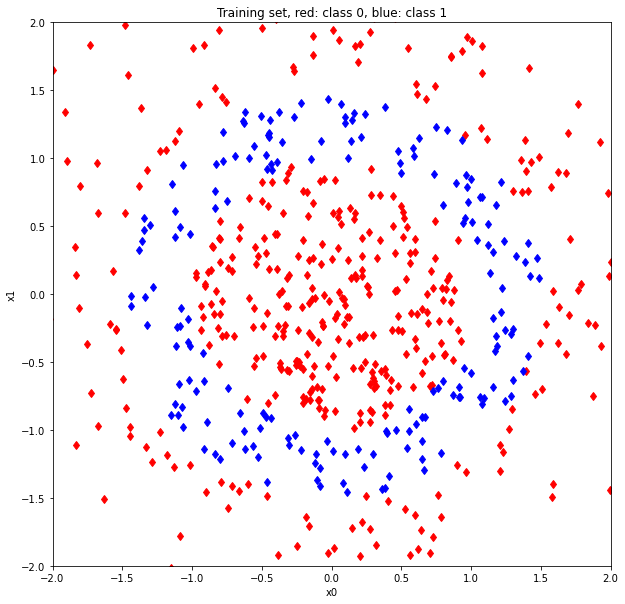

In [35]:
#####################################################
# T is batch size;
# H is hidden dimension
T=640
for H in np.linspace(2,4,2):
    D_in=3  # Input dimension (includes BIAS!)
    D_out=1 #output dimension, class (1,0) or (0,1)


    # create Training Set, classified according with radius to origin.
    # you may include some noise in the classification

    radius1=1
    radius2=1.5
    class_noise=0.0 #to modify later


    # Create random input data
    x=np.zeros(shape=(T,D_in))
    y = np.zeros(shape=(T,1))

    x[:,0] = np.random.randn(T)
    x[:,1] = np.random.randn(T)
    x[:,2] = 1              # For adding a bias in the first stage

    for i in range(T):
        mod=module(x[i,0:2])
        if( mod  + class_noise*np.random.randn()< radius1) or (mod  + class_noise*np.random.randn() > radius2):
            y[i]=0
        else:
            y[i]=1

    #create now a testing_set...same size

    # Create random input data
    xtest=np.ones(shape=(T,D_in))
    ytest = np.zeros(shape=(T,1))

    xtest[:,0] = np.random.randn(T)
    xtest[:,1] = np.random.randn(T)
    xtest[:,2] = 1  # For adding a bias in the first stage

    for i in range(T):
        mod=module(xtest[i,0:2])
        if( mod  + class_noise*np.random.randn()< radius1) or (mod  + class_noise*np.random.randn() > radius2):
            ytest[i]=0
        else:
            ytest[i]=1

    id_1 = np.where(y == 1)[0] #indexes of the elements in the set
    id_0 = np.where(y == 0)[0] #indexes of the elements not in the set



    plt.figure(figsize=(10,10))
    plt.xlim(-2,2) 
    plt.ylim(-2,2) 

    plt.title("Training set, red: class 0, blue: class 1")
    plt.xlabel("x0")
    plt.ylabel("x1")

    plt.plot(x[id_0,0],x[id_0,1],"d",c="red")
    plt.plot(x[id_1,0],x[id_1,1],"d",c="blue")

    plt.show()




# Overfitting

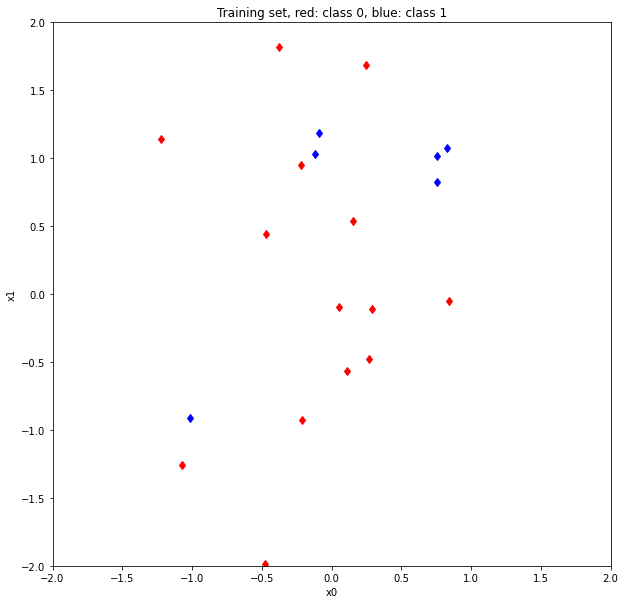

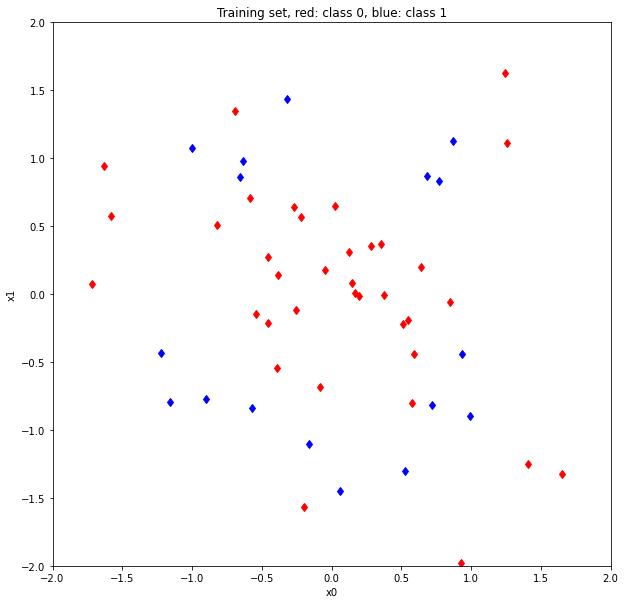

In [43]:
H=20
for T in np.linspace(20,60,2,dtype=int):

    D_in=3  # Input dimension (includes BIAS!)
    D_out=1 #output dimension, class (1,0) or (0,1)


    # create Training Set, classified according with radius to origin.
    # you may include some noise in the classification

    radius1=1
    radius2=1.5
    class_noise=0.0 #to modify later


    # Create random input data
    x=np.zeros(shape=(int(T),D_in))
    y = np.zeros(shape=(T,1))

    x[:,0] = np.random.randn(T)
    x[:,1] = np.random.randn(T)
    x[:,2] = 1              # For adding a bias in the first stage

    for i in range(T):
        mod=module(x[i,0:2])
        if( mod  + class_noise*np.random.randn()< radius1) or (mod  + class_noise*np.random.randn() > radius2):
            y[i]=0
        else:
            y[i]=1

    #create now a testing_set...same size

    # Create random input data
    xtest=np.ones(shape=(T,D_in))
    ytest = np.zeros(shape=(T,1))

    xtest[:,0] = np.random.randn(T)
    xtest[:,1] = np.random.randn(T)
    xtest[:,2] = 1  # For adding a bias in the first stage

    for i in range(T):
        mod=module(xtest[i,0:2])
        if( mod  + class_noise*np.random.randn()< radius1) or (mod  + class_noise*np.random.randn() > radius2):
            ytest[i]=0
        else:
            ytest[i]=1

    id_1 = np.where(y == 1)[0] #indexes of the elements in the set
    id_0 = np.where(y == 0)[0] #indexes of the elements not in the set



    plt.figure(figsize=(10,10))
    plt.xlim(-2,2) 
    plt.ylim(-2,2) 

    plt.title("Training set, red: class 0, blue: class 1")
    plt.xlabel("x0")
    plt.ylabel("x1")

    plt.plot(x[id_0,0],x[id_0,1],"d",c="red")
    plt.plot(x[id_1,0],x[id_1,1],"d",c="blue")

    plt.show()




# Finding the right value of H

0 4.3046791555254424
10 0.387316088380308
20 0.33082096296548913
30 0.31196944690555334
40 0.29780136376048605
50 0.2861031850120553
60 0.2761707293093352
70 0.2669778325789688
80 0.25942113123802846
90 0.2525103898731938
100 0.24617353683657467
110 0.24019787534334244
120 0.2347040833550907
130 0.22939690884395794
140 0.2243902610088947
150 0.2196745858594618
160 0.21527463307896863
170 0.2111479822010391
180 0.20673333735543212
190 0.20225182029984018
200 0.19806042729111611
210 0.1945302331134596
220 0.1912897774901299
230 0.18806011480235713
240 0.1849673204303281
250 0.18201116643622559
260 0.17907715766373705
270 0.17626187353636932
280 0.17355811161343138
290 0.17094183313633632
300 0.1683716164336584
310 0.165677704224701
320 0.1630161246079485
330 0.16063034671764273
340 0.15838814104525917
350 0.1562049274614111
360 0.15418304645477549
370 0.15226969851777278
380 0.1504992039075452
390 0.14878750459230344
400 0.14716187766484276
410 0.14554380575390952
420 0.14396174141495316

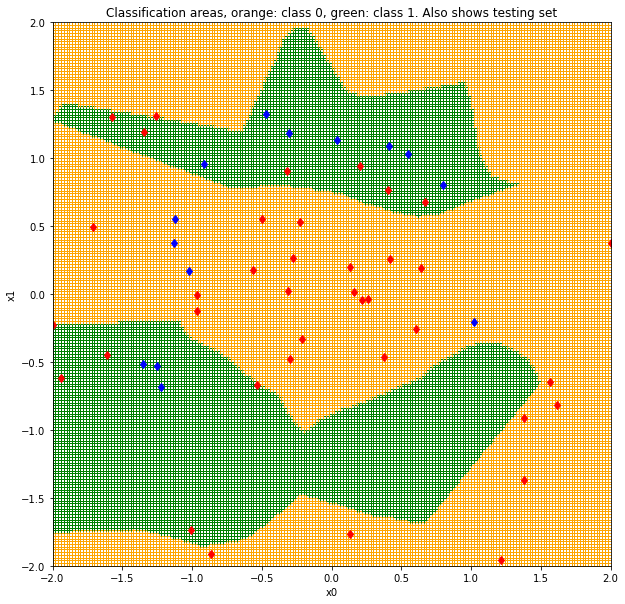

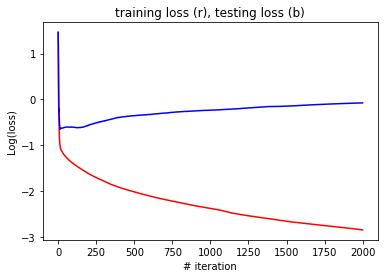

0 0.05807444946569569
10 1.29371818486275
20 0.1581758250597393
30 0.11857109479984793
40 0.09898794302503265
50 0.08920188770846402
60 0.08163630168089875
70 0.07544173273768072
80 0.07042756704883214
90 0.06581017610312237
100 0.062177700817918895
110 0.05867996035139757
120 0.05535927629741756
130 0.052442636147519386
140 0.049718196293181076
150 0.04739436369381784
160 0.044914846805850416
170 0.04279939504540439
180 0.040605909366589414
190 0.03887243191795263
200 0.03694066347499622
210 0.035321172331944
220 0.0338953963433015
230 0.032251495496076664
240 0.030901490002572862
250 0.02963190115562487
260 0.02825786911902678
270 0.02695183132768645
280 0.025766327006475014
290 0.02465649795368853
300 0.02377645042374206
310 0.022767750614900707
320 0.021959016731348615
330 0.020813214949001995
340 0.020077775268505384
350 0.01956786570067388
360 0.01835291960406614
370 0.017646335772787392
380 0.01707802521173844
390 0.0164299625985108
400 0.015741862640301595
410 0.015173696542978

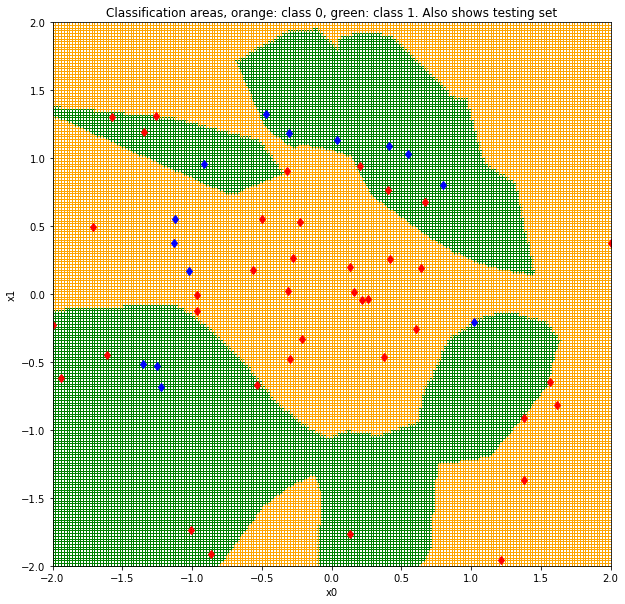

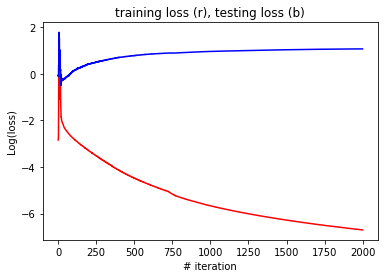

In [49]:
T=640

# Randomly initialize weights
w1 = np.random.randn(D_in, H)
w2 = np.random.randn(H, H)
w3 = np.random.randn(H, D_out)


learning_rates = [1e-3,1e-2]
ITER=2000

tot_loss_array=np.zeros(shape=(ITER,2)) # stores training and testing errors

for learning_rate in learning_rates:
    for t in range(ITER):

        # Forward pass: compute predicted y
      z1 = x.dot(w1)
      a1 = np.maximum(z1,0)     # ReLU
      z2= a1.dot(w2)
      a2=np.maximum(z2,0)       # ReLU
      z3 = a2.dot(w3)
      y_pred = sigmoid(z3)      # Sigmoid

      # Compute and print loss
      loss = - y*safe_log(y_pred) - (1-y)*safe_log(1-y_pred)

      tot_loss_array[t,0]=loss.mean()
      if t%10==0: print(t, loss.mean())

       # check testing error
      ytest_pred=forward(xtest,w1,w2,w3)
      losstest = - ytest*safe_log(ytest_pred) - (1-ytest)*safe_log(1-ytest_pred)
      tot_loss_array[t,1]=losstest.mean()



       # Backprop to compute gradients of w1, w2, w3 with respect to loss
      grad_y_pred = - y*safe_inv(y_pred) + (1-y)*safe_inv(1-y_pred)

      grad_z3=  grad_y_pred*sigmoid(z3)*(1-sigmoid(z3))
      grad_w3 = a2.T.dot(grad_z3)
      grad_a2= grad_z3.dot(w3.T)

      grad_z2=grad_a2.copy()
      grad_z2[z2 < 0] = 0
      grad_w2 = a1.T.dot(grad_z2)
      grad_a1 = grad_z2.dot(w2.T)

      grad_z1 = grad_a1.copy()
      grad_z1[z1 < 0] = 0
      grad_w1 = x.T.dot(grad_z1)




      # Update weights
      # Momentum
      alpha=0.5
      if t==0:
          v1=grad_w1
          v2=grad_w2
          v3=grad_w3
      v1 = alpha*v1 + (1-alpha)*grad_w1
      v2 = alpha*v2 + (1-alpha)*grad_w2
      v3 = alpha*v3 + (1-alpha)*grad_w3

      w1 -= learning_rate * v1
      w2 -= learning_rate * v2
      w3 -= learning_rate * v3


      #if (t%250==0): 
          #plot_grid(w1, w2, w3, xtest, ytest)


    plot_grid(w1, w2, w3, xtest, ytest)

    plt.title("training loss (r), testing loss (b)")
    plt.xlabel("# iteration")
    plt.ylabel("Log(loss)")

    plt.plot(np.log(tot_loss_array[:,0]), c="red")
    plt.plot(np.log(tot_loss_array[:,1]), c="blue")
    plt.show()

In [ ]:
plt.show()